<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP0/ML2025_MiniP0_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW0 - Part 4 (Iris Dataset)
----
Arash Razi - 40305924

In this part, problems mentioned in the 4th section of the first homewrok are solved.

---------------------------------

Initial Review
---

2. Importing Irsi dataset using scikit-learn library

In [ ]:
from sklearn.datasets import load_iris

dataset = load_iris()

3. Storing dataset in pandas.DataFrame (Doing this for both train and test data)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame(dataset.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['species'] = dataset.target



3.1 now that dataset is stored in a DataFrame, train and test data should be seprated

In [ ]:
train_df, test_df = train_test_split(df,test_size=0.2,random_state=42,stratify=df['species'])

4. now we mix the train and test data together in one DataFraem


In [ ]:
final_df = pd.concat([train_df, test_df], ignore_index=True)

Vissual Analysis Of Dataset
----


1. in this part two features of the Iirs Dataset is chossen:

        *sepal_length

        *petal_length

    and the results are as follows:

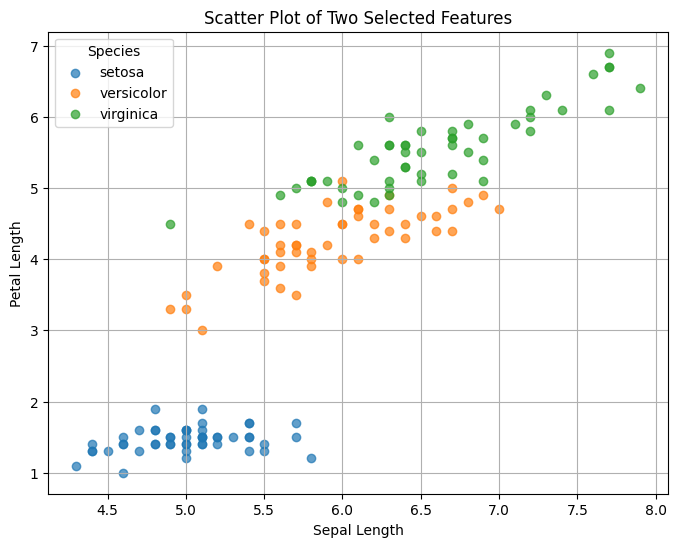

In [ ]:
import matplotlib.pyplot as plt
feature_x = 'sepal_length'
feature_y = 'petal_length'


plt.figure(figsize=(8, 6))
for species, label in zip([0, 1, 2], dataset.target_names):
    subset = final_df[final_df['species'] == species]
    plt.scatter(subset[feature_x], subset[feature_y], label=label, alpha=0.7)


plt.xlabel(feature_x.replace('_', ' ').title())
plt.ylabel(feature_y.replace('_', ' ').title())
plt.title('Scatter Plot of Two Selected Features')
plt.legend(title="Species")
plt.grid(True)

plt.show()

2. now these three features are selected:

        *sepal_length

        *sepal_width

        *petal_length
    and the 3D visulisaion is as follows:

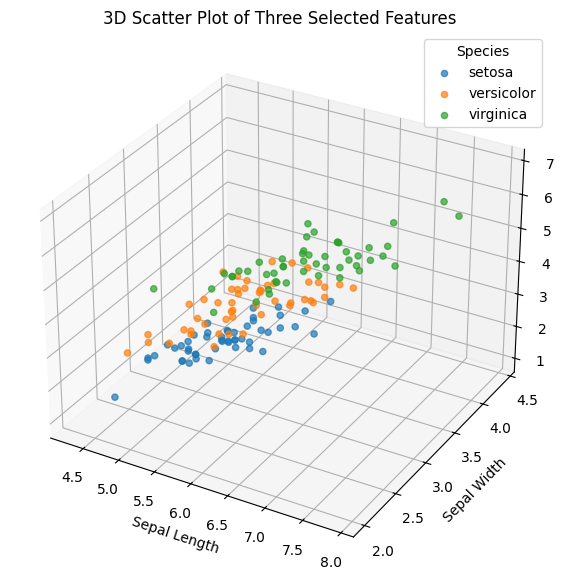

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


feature_x = 'sepal_length'
feature_y = 'sepal_width'
feature_z = 'petal_length'


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for species, label in zip([0, 1, 2], dataset.target_names):
    subset = final_df[final_df['species'] == species]
    ax.scatter(subset[feature_x], subset[feature_y], subset[feature_z], label=label, alpha=0.7)


ax.set_xlabel(feature_x.replace('_', ' ').title())
ax.set_ylabel(feature_y.replace('_', ' ').title())
ax.set_zlabel(feature_z.replace('_', ' ').title())
ax.set_title('3D Scatter Plot of Three Selected Features')
ax.legend(title="Species")

plt.show()

3. Plotting Heatmap of Features


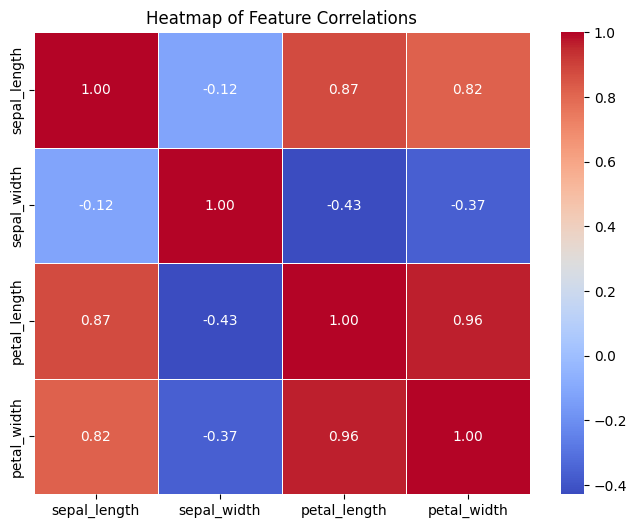

In [ ]:
import seaborn as sns

correlation_matrix = final_df.drop(columns=['species']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Feature Correlations")
plt.show()



4. Probability Density Function Of the data(PDF)

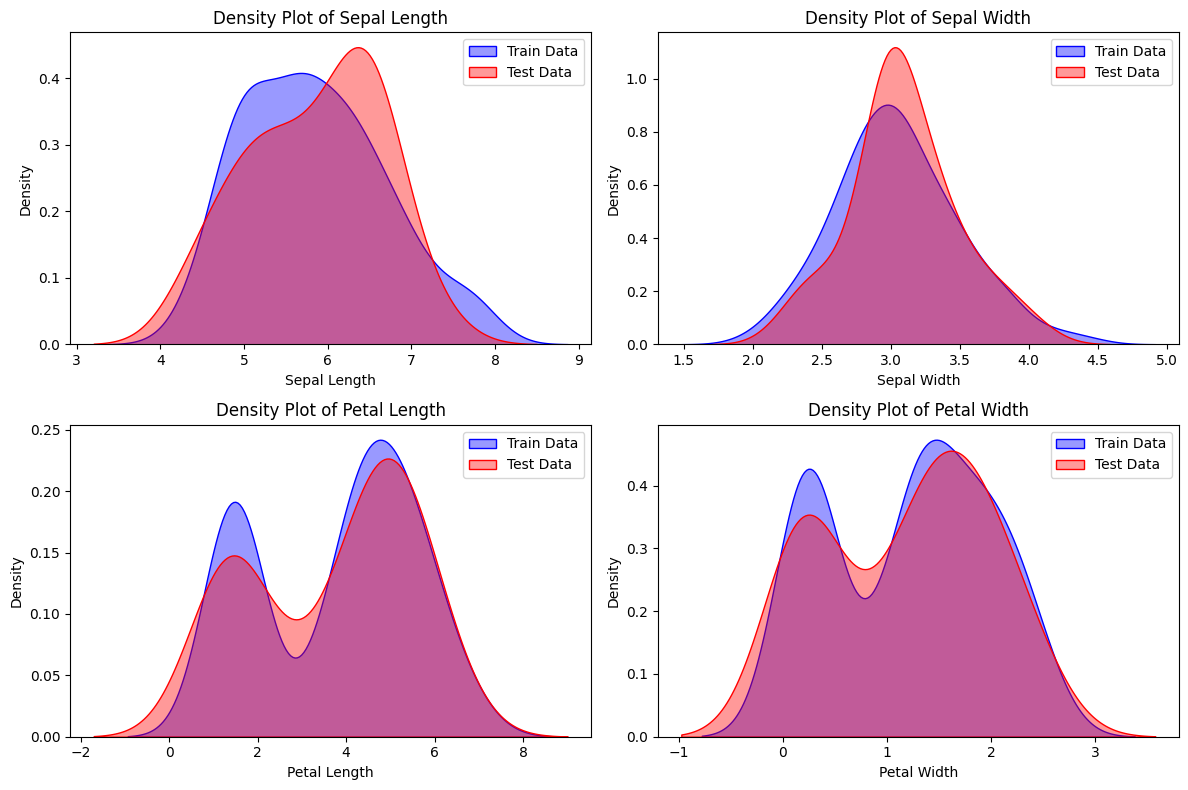

In [ ]:
import seaborn as sns

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(train_df[feature], label="Train Data", fill=True, color='blue', alpha=0.4)
    sns.kdeplot(test_df[feature], label="Test Data", fill=True, color='red', alpha=0.4)

    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel("Density")
    plt.title(f"Density Plot of {feature.replace('_', ' ').title()}")
    plt.legend()

plt.tight_layout()
plt.show()


Discretization of Continuous Data
----

In [ ]:
import pandas as pd

feature = 'sepal_length'


bins = df[feature].quantile([0, 1/3, 2/3, 1]).values
labels = ["Short", "Medium", "Tall"]


df["sepal_length_category"] = pd.cut(df[feature], bins=bins, labels=labels, include_lowest=True)


print(df["sepal_length_category"].value_counts())


sepal_length_category
Medium    56
Short     52
Tall      42
Name: count, dtype: int64


Statictical Analysis
---


In [ ]:
setosa_df = df[df['species'] == 0]

setosa_stats = setosa_df.describe()

print(setosa_stats)

       sepal_length  sepal_width  petal_length  petal_width  species
count      50.00000    50.000000     50.000000    50.000000     50.0
mean        5.00600     3.428000      1.462000     0.246000      0.0
std         0.35249     0.379064      0.173664     0.105386      0.0
min         4.30000     2.300000      1.000000     0.100000      0.0
25%         4.80000     3.200000      1.400000     0.200000      0.0
50%         5.00000     3.400000      1.500000     0.200000      0.0
75%         5.20000     3.675000      1.575000     0.300000      0.0
max         5.80000     4.400000      1.900000     0.600000      0.0
